In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data_path = 'C:\\Users\\``Emmanuel Oguntomi\\Desktop\\Revent\\Housing_dataset_train.csv'
test_data_path = 'C:\\Users\\``Emmanuel Oguntomi\\Desktop\\Revent\\Housing_dataset_test.csv'

In [4]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [5]:
train_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [6]:
test_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [9]:
# shows the shape of the data. other details includes (dimension, data_type, and data_size) 
train_data.shape, train_data.ndim, train_data.size

((14000, 7), 2, 98000)

# Exploratory Data Analysis - EDA

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14000.0,4.862700e+03,3.818348e+03,0.00,1.672750e+03,3.527000e+03,8011.250,12999.00
bedroom,12201.0,4.308171e+00,2.441165e+00,1.00,2.000000e+00,4.000000e+00,6.000,9.00
bathroom,12195.0,3.134235e+00,2.035950e+00,1.00,1.000000e+00,2.000000e+00,5.000,7.00
parking_space,12189.0,3.169825e+00,1.599415e+00,1.00,2.000000e+00,3.000000e+00,4.000,6.00
price,14000.0,2.138082e+06,1.083057e+06,431967.29,1.393990e+06,1.895223e+06,2586699.494,16568486.16


In [11]:
train_data.describe([0.1,0.25,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,50%,65%,75%,90%,95%,max
ID,14000.0,4.862700e+03,3.818348e+03,0.00,6.720000e+02,1.672750e+03,3.527000e+03,6.036400e+03,8011.250,10998.100,1.197905e+04,12999.00
bedroom,12201.0,4.308171e+00,2.441165e+00,1.00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000,8.000,9.000000e+00,9.00
bathroom,12195.0,3.134235e+00,2.035950e+00,1.00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000,6.000,7.000000e+00,7.00
parking_space,12189.0,3.169825e+00,1.599415e+00,1.00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000,6.000,6.000000e+00,6.00
price,14000.0,2.138082e+06,1.083057e+06,431967.29,1.099909e+06,1.393990e+06,1.895223e+06,2.278288e+06,2586699.494,3450534.212,4.169290e+06,16568486.16


In [12]:
train_data.nunique()

ID               10182
loc                 36
title               10
bedroom              9
bathroom             7
parking_space        6
price            10727
dtype: int64

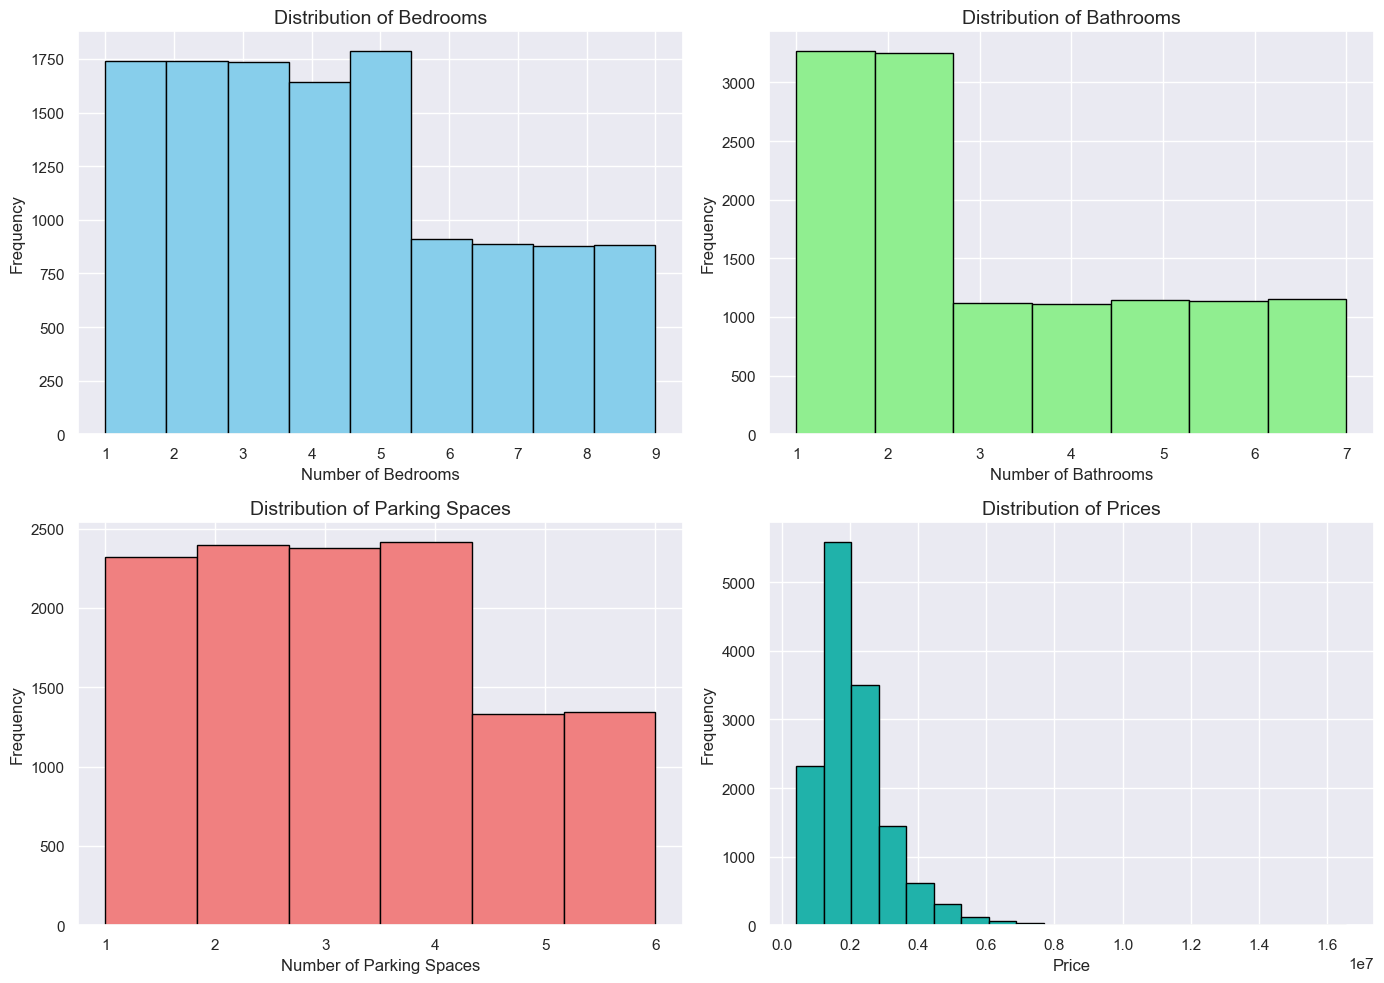

In [29]:
# Plot distribution of numerical columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Bedrooms
axes[0, 0].hist(train_data['bedroom'].dropna(), bins=9, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Bedrooms', fontsize=14)
axes[0, 0].set_xlabel('Number of Bedrooms', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Distribution of Bathrooms
axes[0, 1].hist(train_data['bathroom'].dropna(), bins=7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Bathrooms', fontsize=14)
axes[0, 1].set_xlabel('Number of Bathrooms', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Distribution of Parking Spaces
axes[1, 0].hist(train_data['parking_space'].dropna(), bins=6, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of Parking Spaces', fontsize=14)
axes[1, 0].set_xlabel('Number of Parking Spaces', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Distribution of Prices
axes[1, 1].hist(train_data['price'], bins=20, color='lightseagreen', edgecolor='black')
axes[1, 1].set_title('Distribution of Prices', fontsize=14)
axes[1, 1].set_xlabel('Price', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

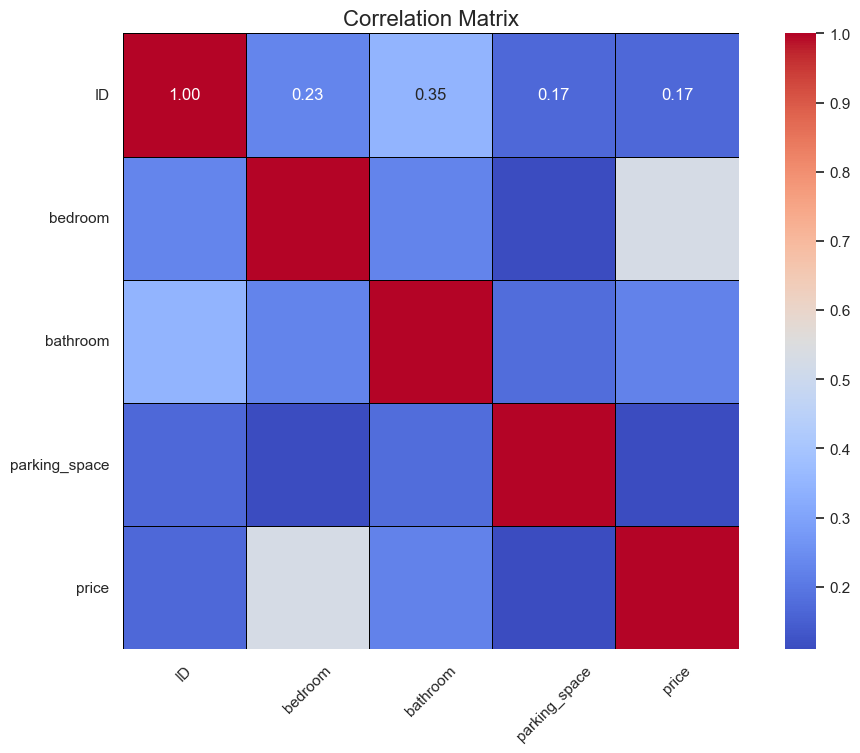

In [33]:
# Calculate the correlation matrix only for numerical columns
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numerical_cols].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
            linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [24]:
# Analyze the distribution of categorical features
loc_counts = train_data['loc'].value_counts()
title_counts = train_data['title'].value_counts()

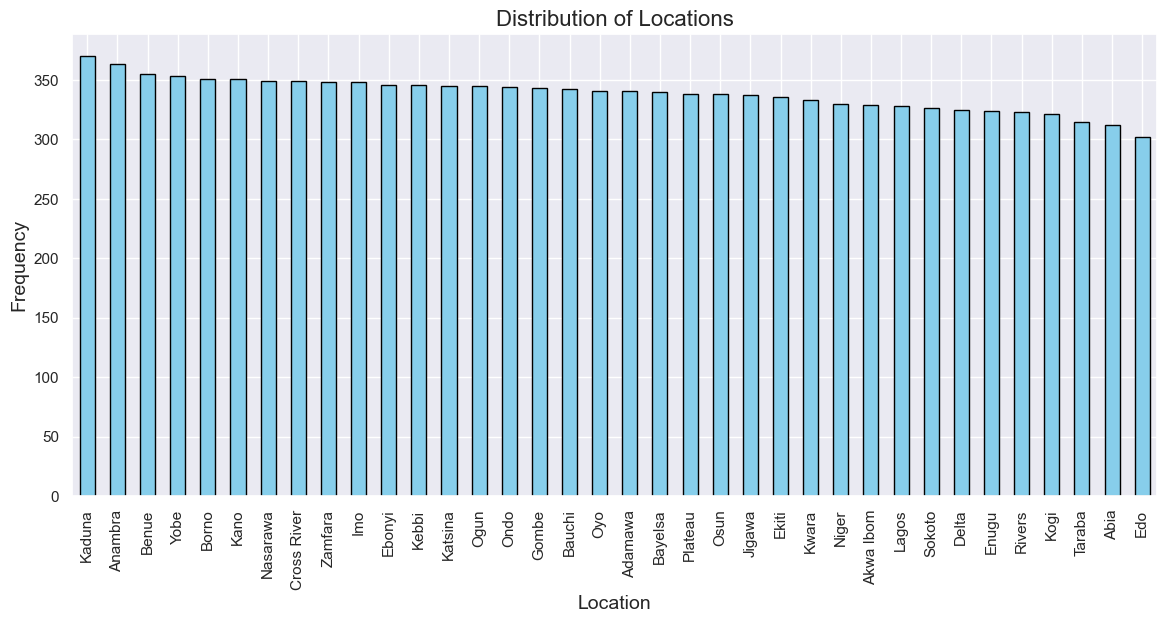

In [25]:
# Plot the distribution of locations
plt.figure(figsize=(14, 6))
loc_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Locations', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.show()

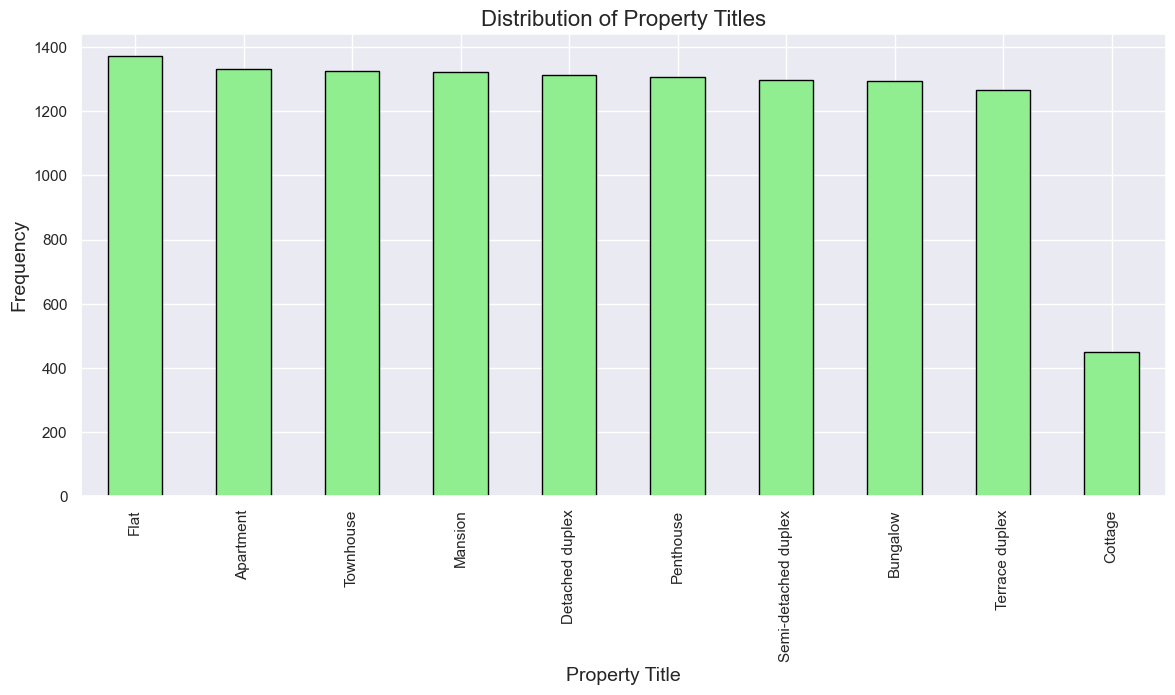

In [26]:
# Plot the distribution of property titles
plt.figure(figsize=(14, 6))
title_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Property Titles', fontsize=16)
plt.xlabel('Property Title', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.show()

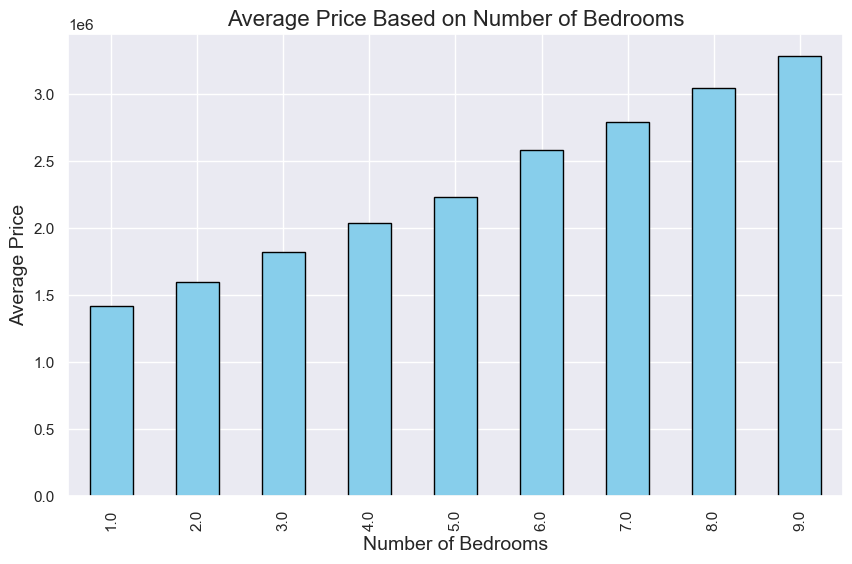

In [30]:
# Average price based on number of bedrooms
avg_price_bedroom = train_data.groupby('bedroom')['price'].mean()

plt.figure(figsize=(10, 6))
avg_price_bedroom.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price Based on Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.show()

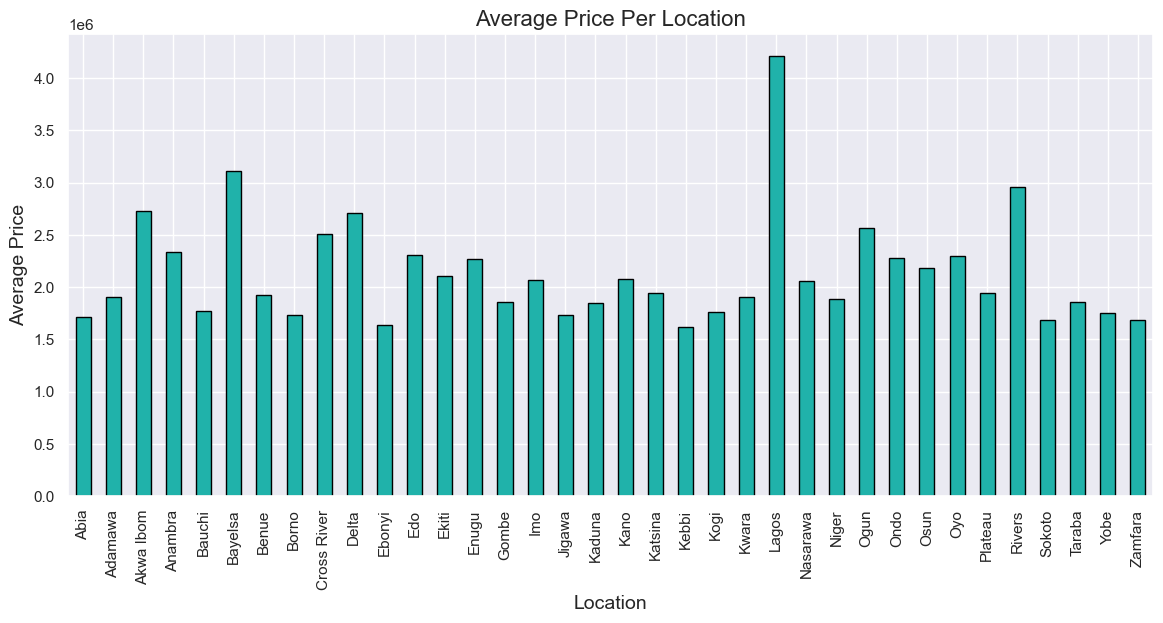

In [31]:
# Average price per location
avg_price_location = train_data.groupby('loc')['price'].mean()

plt.figure(figsize=(14, 6))
avg_price_location.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title('Average Price Per Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=90)
plt.show()

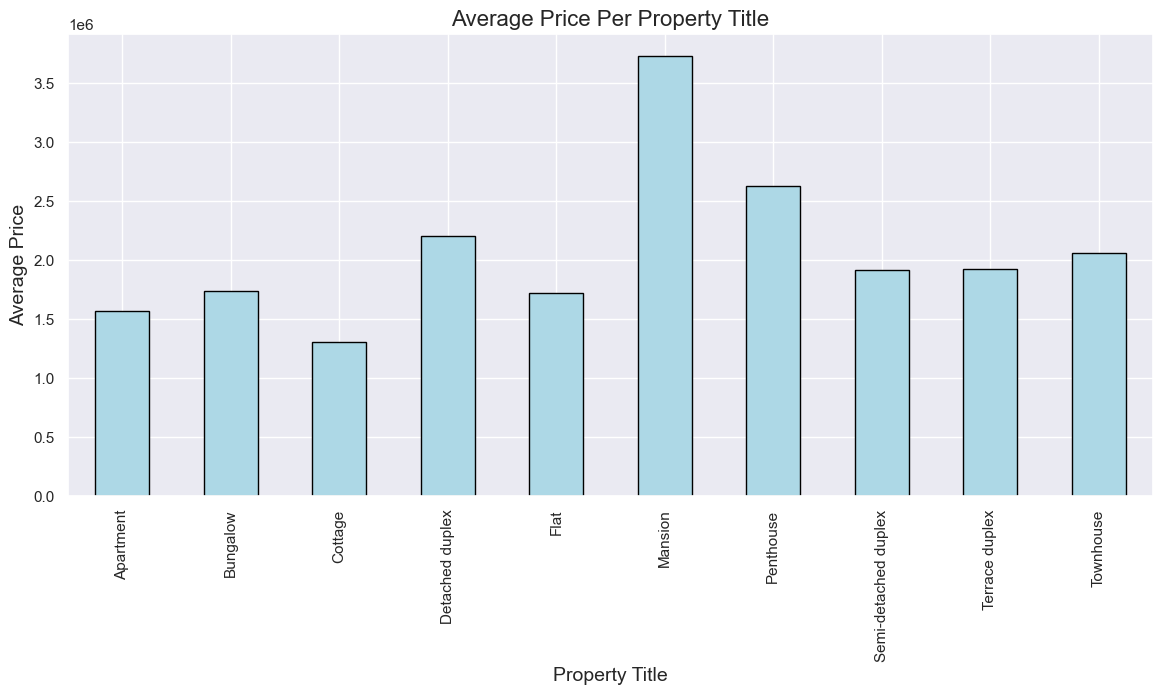

In [32]:
# Average price per property title
avg_price_title = train_data.groupby('title')['price'].mean()

plt.figure(figsize=(14, 6))
avg_price_title.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Price Per Property Title', fontsize=16)
plt.xlabel('Property Title', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Data cleaning and Preprocessing for Machine Learning

In [13]:
# Drop columns with too many missing values
train_data = train_data.drop(columns=['ID'])
test_data = test_data.drop(columns=['ID'])

In [14]:
import missingno as msno

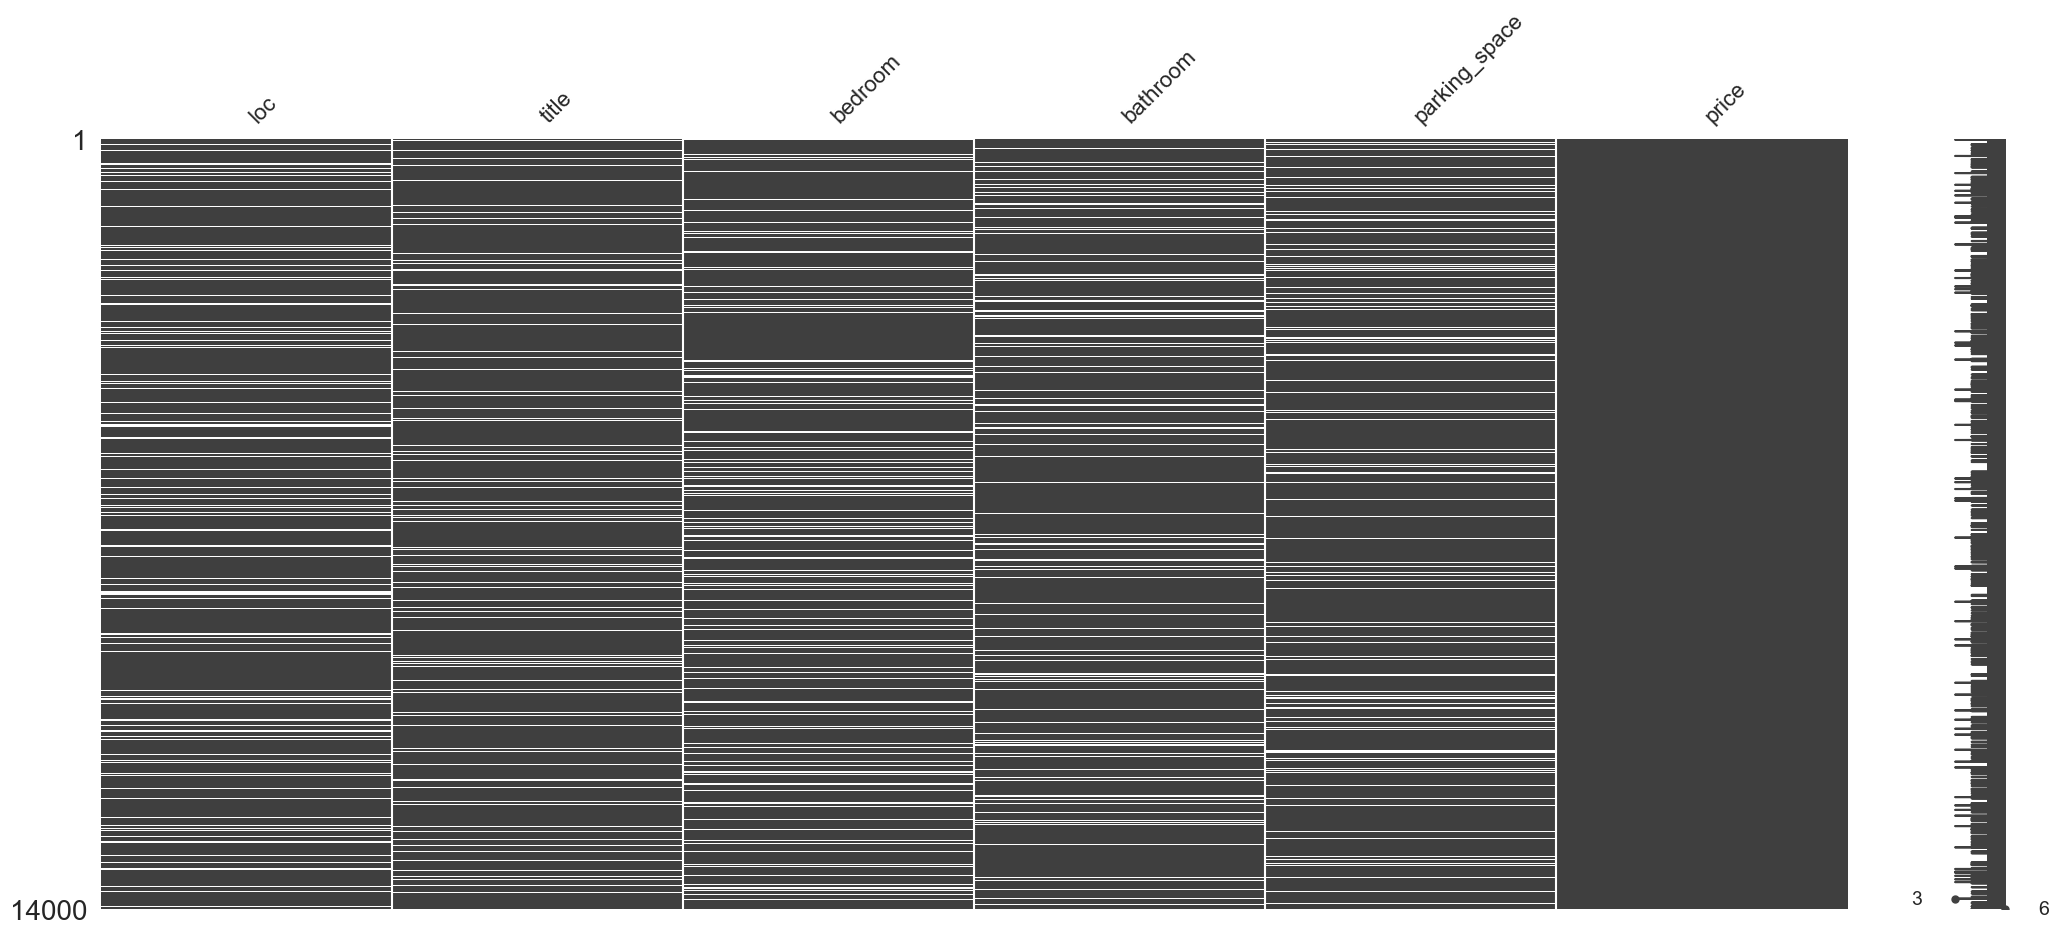

In [15]:
msno.matrix(train_data);

#### Cleaning the Location column

In [16]:
# Check for missing values in the ID column
missing_loc = train_data['loc'].isnull().sum()

# Explore unique values in the loc column
unique_locs = train_data['loc'].unique()

In [17]:
print(f"Duplicate locations in Train Dataset: {missing_loc}")
print(f"Unique locations in Train Dataset: {unique_locs}")

Duplicate locations in Train Dataset: 1813
Unique locations in Train Dataset: ['Katsina' 'Ondo' 'Ekiti' 'Anambra' 'Kogi' 'Borno' 'Kwara' 'Osun' 'Kaduna'
 'Ogun' 'Bayelsa' nan 'Abia' 'Rivers' 'Taraba' 'Ebonyi' 'Kebbi' 'Enugu'
 'Edo' 'Nasarawa' 'Delta' 'Kano' 'Yobe' 'Benue' 'Bauchi' 'Cross River'
 'Niger' 'Adamawa' 'Plateau' 'Imo' 'Oyo' 'Zamfara' 'Sokoto' 'Jigawa'
 'Gombe' 'Akwa Ibom' 'Lagos']


In [18]:
total_rows = len(train_data)
missing_loc_proportion = (missing_loc / total_rows) * 100
print(f"Proportion of rows with missing 'loc' values: {missing_loc_proportion:.2f}%")


Proportion of rows with missing 'loc' values: 12.95%


In [19]:
# Remove rows where 'loc' values are missing
train_data = train_data.dropna(subset=['loc'])

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12187 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            12187 non-null  object 
 1   title          10531 non-null  object 
 2   bedroom        10443 non-null  float64
 3   bathroom       10455 non-null  float64
 4   parking_space  10446 non-null  float64
 5   price          12187 non-null  float64
dtypes: float64(4), object(2)
memory usage: 666.5+ KB


#### Cleaning the Title column

In [21]:
# Calculate the number of missing values in the 'title' column
missing_title_count = train_data['title'].isnull().sum()

# Calculate the frequency distribution of the non-missing values
title_distribution = train_data['title'].value_counts(normalize=True)

# Generate random values based on the distribution to fill missing entries
missing_titles = np.random.choice(title_distribution.index, size=missing_title_count, p=title_distribution.values)

# Assign these random values to the missing entries
train_data.loc[train_data['title'].isnull(), 'title'] = missing_titles

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12187 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            12187 non-null  object 
 1   title          12187 non-null  object 
 2   bedroom        10443 non-null  float64
 3   bathroom       10455 non-null  float64
 4   parking_space  10446 non-null  float64
 5   price          12187 non-null  float64
dtypes: float64(4), object(2)
memory usage: 666.5+ KB


#### Cleaning the Bedroom column

In [23]:
# Calculate the first quartile (Q1) for each title
Q1 = train_data.groupby('title')['bedroom'].quantile(0.25)

# Calculate the third quartile (Q3) for each title
Q3 = train_data.groupby('title')['bedroom'].quantile(0.75)

# Calculate the interquartile range (IQR) for each title
IQR = Q3 - Q1

# Combine the results into a single DataFrame
title_bedroom_stats = pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR
})

# Display the IQR values
title_bedroom_stats


,Q1,Q3,IQR
title,,,
Apartment,2.0,6.0,4.0
Bungalow,2.0,6.0,4.0
Cottage,2.0,4.0,2.0
Detached duplex,2.0,6.0,4.0
Flat,2.0,6.0,4.0
Mansion,2.0,6.0,4.0
Penthouse,2.0,6.0,4.0
Semi-detached duplex,2.0,6.0,4.0
Terrace duplex,2.0,6.0,4.0


In [24]:
# nOW, we will use the median for imputation within IQR
title_bedroom_median = train_data.groupby('title')['bedroom'].median()

# Then we will fill missing bedroom values using the median of the corresponding title
train_data['bedroom'] = train_data.apply(
    lambda row: title_bedroom_median[row['title']] if pd.isnull(row['bedroom']) else row['bedroom'],
    axis=1
)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12187 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            12187 non-null  object 
 1   title          12187 non-null  object 
 2   bedroom        12187 non-null  float64
 3   bathroom       10455 non-null  float64
 4   parking_space  10446 non-null  float64
 5   price          12187 non-null  float64
dtypes: float64(4), object(2)
memory usage: 666.5+ KB


#### Cleaning the Bathrooom column

In [26]:
# Calculate the IQR for the bathroom column for each title
Q1_bathroom = train_data.groupby('title')['bathroom'].quantile(0.25)
Q3_bathroom = train_data.groupby('title')['bathroom'].quantile(0.75)
IQR_bathroom = Q3_bathroom - Q1_bathroom

# Combine the results into a single DataFrame
title_bathroom_stats = pd.DataFrame({
    'Q1_bathroom': Q1_bathroom,
    'Q3_bathroom': Q3_bathroom,
    'IQR_bathroom': IQR_bathroom
})

# Display the IQR values
title_bathroom_stats

,Q1_bathroom,Q3_bathroom,IQR_bathroom
title,,,
Apartment,1.0,5.0,4.0
Bungalow,2.0,5.0,3.0
Cottage,1.0,2.0,1.0
Detached duplex,1.0,5.0,4.0
Flat,1.0,5.0,4.0
Mansion,1.0,5.0,4.0
Penthouse,1.0,5.0,4.0
Semi-detached duplex,1.0,5.0,4.0
Terrace duplex,1.0,5.0,4.0


In [27]:
# Use the median for imputation within IQR
title_bathroom_median = train_data.groupby('title')['bathroom'].median()

# Fill missing bathroom values using the median of the corresponding title
train_data['bathroom'] = train_data.apply(
    lambda row: title_bathroom_median[row['title']] if pd.isnull(row['bathroom']) else row['bathroom'],
    axis=1
)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12187 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            12187 non-null  object 
 1   title          12187 non-null  object 
 2   bedroom        12187 non-null  float64
 3   bathroom       12187 non-null  float64
 4   parking_space  10446 non-null  float64
 5   price          12187 non-null  float64
dtypes: float64(4), object(2)
memory usage: 666.5+ KB


#### Cleaning the Parking_space column

In [29]:
# Calculate the IQR for the parking_space column for each title
Q1_parking_space = train_data.groupby('title')['parking_space'].quantile(0.25)
Q3_parking_space = train_data.groupby('title')['parking_space'].quantile(0.75)
IQR_parking_space = Q3_parking_space - Q1_parking_space

# Combine the results into a single DataFrame
title_parking_space_stats = pd.DataFrame({
    'Q1_parking_space': Q1_parking_space,
    'Q3_parking_space': Q3_parking_space,
    'IQR_parking_space': IQR_parking_space
})

# Display the IQR values
title_bathroom_stats

,Q1_bathroom,Q3_bathroom,IQR_bathroom
title,,,
Apartment,1.0,5.0,4.0
Bungalow,2.0,5.0,3.0
Cottage,1.0,2.0,1.0
Detached duplex,1.0,5.0,4.0
Flat,1.0,5.0,4.0
Mansion,1.0,5.0,4.0
Penthouse,1.0,5.0,4.0
Semi-detached duplex,1.0,5.0,4.0
Terrace duplex,1.0,5.0,4.0


In [30]:
# Use the median for imputation within IQR
title_parking_space_median = train_data.groupby('title')['parking_space'].median()

# Fill missing parking_space values using the median of the corresponding title
train_data['parking_space'] = train_data.apply(
    lambda row: title_parking_space_median[row['title']] if pd.isnull(row['parking_space']) else row['parking_space'],
    axis=1
)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12187 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            12187 non-null  object 
 1   title          12187 non-null  object 
 2   bedroom        12187 non-null  float64
 3   bathroom       12187 non-null  float64
 4   parking_space  12187 non-null  float64
 5   price          12187 non-null  float64
dtypes: float64(4), object(2)
memory usage: 666.5+ KB


### Encoding Categorical Variables

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder_loc = LabelEncoder()
label_encoder_title = LabelEncoder()

train_data['loc'] = label_encoder_loc.fit_transform(train_data['loc'])
train_data['title'] = label_encoder_title.fit_transform(train_data['title'])

test_data['loc'] = label_encoder_loc.fit_transform(test_data['loc'])
test_data['title'] = label_encoder_title.fit_transform(test_data['title'])

In [33]:
# Firstly we will retrieve the categories for 'loc' and 'title' after encoding
loc_categories = label_encoder_loc.classes_
title_categories = label_encoder_title.classes_

# Then let us create a dictionary to map each category to its corresponding encoded value
loc_category_mapping = {index: category for index, category in enumerate(loc_categories)}
title_category_mapping = {index: category for index, category in enumerate(title_categories)}

In [34]:
loc_category_mapping

{0: 'Abia',
 1: 'Adamawa',
 2: 'Akwa Ibom',
 3: 'Anambra',
 4: 'Bauchi',
 5: 'Bayelsa',
 6: 'Benue',
 7: 'Borno',
 8: 'Cross River',
 9: 'Delta',
 10: 'Ebonyi',
 11: 'Edo',
 12: 'Ekiti',
 13: 'Enugu',
 14: 'Gombe',
 15: 'Imo',
 16: 'Jigawa',
 17: 'Kaduna',
 18: 'Kano',
 19: 'Katsina',
 20: 'Kebbi',
 21: 'Kogi',
 22: 'Kwara',
 23: 'Lagos',
 24: 'Nasarawa',
 25: 'Niger',
 26: 'Ogun',
 27: 'Ondo',
 28: 'Osun',
 29: 'Oyo',
 30: 'Plateau',
 31: 'Rivers',
 32: 'Sokoto',
 33: 'Taraba',
 34: 'Yobe',
 35: 'Zamfara'}

In [35]:
title_category_mapping

{0: 'Apartment',
 1: 'Bungalow',
 2: 'Cottage',
 3: 'Detached duplex',
 4: 'Flat',
 5: 'Mansion',
 6: 'Penthouse',
 7: 'Semi-detached duplex',
 8: 'Terrace duplex',
 9: 'Townhouse'}

In [36]:
train_data.head()

,loc,title,bedroom,bathroom,parking_space,price
0,19,7,2.0,2.0,1.0,1149999.565
1,27,0,4.0,2.0,4.0,1672416.689
2,12,7,7.0,5.0,3.0,3364799.814
3,3,3,5.0,2.0,4.0,2410306.756
4,21,8,4.0,5.0,6.0,2600700.898


# Machine learning

#### Train-Test Split

In [37]:
# 1. let usSeparate the features and the target variable from the training data

from sklearn.model_selection import train_test_split

X = train_data.drop(columns= 'price')
y = train_data['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Let us see the shapes of the split datasets
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(9749, 5) (2438, 5) (9749,) (2438,)


#### Train some Models

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the validation set
y_lr_pred = lr_model.predict(X_val)

# Calculate the MSE and R2 score
lr_mse = mean_squared_error(y_val, y_lr_pred)
r2 = r2_score(y_val, y_lr_pred)

print(f"Decision Tree MSE: {lr_mse}")
print(f"  R2 Score: {r2:.4f}")

Decision Tree MSE: 896961076512.6072
  R2 Score: 0.2754


In [41]:
# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the validation set
y_tree_pred = tree_model.predict(X_val)

# Calculate the MSE and R2 score
tree_mse = mean_squared_error(y_val, y_tree_pred)
r2 = r2_score(y_val, y_tree_pred)

print(f"Decision Tree MSE: {tree_mse}")
print(f"  R2 Score: {r2:.4f}")

Decision Tree MSE: 612678185058.9014
  R2 Score: 0.5050


In [42]:
# Initialize the model
forest_model = RandomForestRegressor(random_state=42)

# Train the model
forest_model.fit(X_train, y_train)

# Predict on the validation set
y_forest_pred = forest_model.predict(X_val)

# Calculate the MSE and R2 Score
forest_mse = mean_squared_error(y_val, y_forest_pred)
r2 = r2_score(y_val, y_forest_pred)

print(f"Random Forest MSE: {forest_mse}")
print(f"  R2 Score: {r2:.4f}")

Random Forest MSE: 384506272065.7925
  R2 Score: 0.6894


In [43]:
# Initialize the model
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on the validation set
y_gbr_pred = gbr_model.predict(X_val)

# Calculate the MSE and R2 score
gbr_mse = mean_squared_error(y_val, y_gbr_pred)
r2 = r2_score(y_val, y_gbr_pred)

print(f"Gradient Boosting MSE: {gbr_mse}")
print(f"  R2 Score: {r2:.4f}")

Gradient Boosting MSE: 360787233019.4598
  R2 Score: 0.7085


In [44]:
# Initialize the model
rdg_model = Ridge(random_state=42)

# Train the model
rdg_model.fit(X_train, y_train)

# Predict on the validation set
y_rdg_pred = rdg_model.predict(X_val)

# Calculate the MSE and R2 score
rdg_mse = mean_squared_error(y_val, y_rdg_pred)
r2 = r2_score(y_val, y_rdg_pred)

print(f"Ridge regression MSE: {rdg_mse}")
print(f"  R2 Score: {r2:.4f}")

Ridge regression MSE: 896961860606.506
  R2 Score: 0.2754


In [45]:
# Initialize the model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the validation set
y_svr_pred = svr_model.predict(X_val)

# Calculate the MSE and R2
svr_mse = mean_squared_error(y_val, y_svr_pred)
r2 = r2_score(y_val, y_svr_pred)

print(f"SVR MSE: {svr_mse}")
print(f"  R2 Score: {r2:.4f}")

SVR MSE: 1299648779271.415
  R2 Score: -0.0500


In [46]:
# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_xgb_pred = xgb_model.predict(X_val)

# Calculate the MSE and R2 score
xgb_mse = mean_squared_error(y_val, y_xgb_pred)
r2 = r2_score(y_val, y_xgb_pred)

print(f"XGB Regressor MSE: {xgb_mse}")
print(f"  R2 Score: {r2:.4f}")

XGB Regressor MSE: 326897021603.2312
  R2 Score: 0.7359


In [47]:
# Initialize the model
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the validation set
y_knn_pred = knn_model.predict(X_val)

# Calculate the MSE and R2 score
knn_mse = mean_squared_error(y_val, y_knn_pred)
r2 = r2_score(y_val, y_knn_pred)

print(f"KNN Regression MSE: {knn_mse}")
print(f"  R2 Score: {r2:.4f}")

KNN Regression MSE: 572023704084.6038
  R2 Score: 0.5379


In [48]:
# Initialize the model
lasso_model = Lasso(random_state=42)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the validation set
y_lasso_pred = lasso_model.predict(X_val)

# Calculate the MSE and R2 score
lasso_mse = mean_squared_error(y_val, y_lasso_pred)
r2 = r2_score(y_val, y_lasso_pred)

print(f"Lasso MSE: {lasso_mse}")
print(f"  R2 Score: {r2:.4f}")

Lasso MSE: 896961121166.4767
  R2 Score: 0.2754


In [49]:
# Initialize the model
enr_model = ElasticNet(random_state=42)

# Train the model
enr_model.fit(X_train, y_train)

# Predict on the validation set
y_enr_pred = enr_model.predict(X_val)

# Calculate the MSE and R2 score
enr_mse = mean_squared_error(y_val, y_enr_pred)
r2 = r2_score(y_val, y_enr_pred)

print(f"Elastic Net Regression MSE: {enr_mse}")
print(f"  R2 Score: {r2:.4f}")

Elastic Net Regression MSE: 902479316614.0004
  R2 Score: 0.2709


#### Model Evaluation

The best trained model was for to evaluate our test data was selected. The best regression model(XGBoost Regressor) for this project was select based on
its Mean Square Error: 324035627834.29736 &  R2 Score: 0.738. The model achieved the least MSE and highest R2 score making it the best trained regression model2

#### Make Predictions on the Test Set

In [50]:
# Predict on the test set
test_predictions = xgb_model.predict(test_data)

# Convert test predictions to integers (whole numbers)
test_predictions = test_predictions.astype(int)

# Add predictions to the test dataset
test_data['predicted_price'] = test_predictions

In [51]:
# Inverse transform the label-encoded columns to their original values
test_data['loc'] = label_encoder_loc.inverse_transform(test_data['loc'])
test_data['title'] = label_encoder_title.inverse_transform(test_data['title'])

In [52]:
# Display the test dataset with predictions
print(test_data)

          loc                 title  bedroom  bathroom  parking_space  \
0        Kano             Penthouse        4         1              2   
1     Adamawa             Apartment        2         2              4   
2     Adamawa              Bungalow        2         7              2   
3       Lagos               Mansion        9         5              2   
4       Gombe  Semi-detached duplex        5         6              1   
...       ...                   ...      ...       ...            ...   
5995    Ekiti                  Flat        4         5              2   
5996  Adamawa        Terrace duplex        5         7              1   
5997      Oyo             Townhouse        4         1              4   
5998   Bauchi                  Flat        3         7              5   
5999   Sokoto               Mansion        6         1              6   

      predicted_price  
0             2209919  
1             1011595  
2              874638  
3             7400058  
4  

In [53]:
# Save the updated dataset with predictions to a new CSV file

out_path = 'C:\\Users\\``Emmanuel Oguntomi\\Desktop\\Revent\\predicted_Housing_dataset.csv'
test_data.to_csv(out_path, index=False)